In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [53]:
a = pd.read_csv("bigdatamart_Train.csv") 
b = pd.read_csv("bigdatamart_Test.csv")

In [55]:

c = b.iloc[:, 0]
d = b.iloc[:, 6]

a.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)
b.drop(['Item_Identifier', 'Outlet_Identifier'], axis = 1, inplace = True)

 stored numerical and categorical feature names in a variable for future use.

In [56]:
categorical = ['Item_Fat_Content', 'Outlet_Size','Outlet_Location_Type','Outlet_Type', 'Item_Type']
continuous = ['Item_Weight','Item_Visibility', 'Item_MRP','Item_Outlet_Sales']

In [57]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [58]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


There are 9 features among which 5 are categorical and 4 are continuous.
Target variable is Item_Outlet_Sales and it is a continuous variable.
Both training and testing data have the same continuous and categorical features with the exception of target variable.
Eventhogh number of features are same, the testing data has less number of observations.

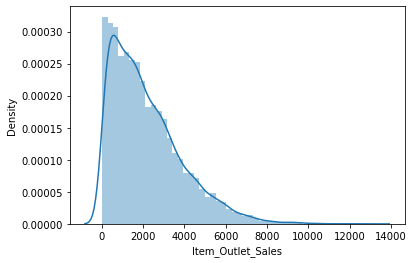

In [59]:
sns.distplot(a['Item_Outlet_Sales'])
plt.show()

Target variable is skewed properly

In [60]:
a.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [61]:
b.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300,reg,0.038428,Dairy,87.3198,2007,NaN,Tier 2,Supermarket Type1
2,14.600,Low Fat,0.099575,Others,241.7538,1998,NaN,Tier 3,Grocery Store
3,7.315,Low Fat,0.015388,Snack Foods,155.0340,2007,NaN,Tier 2,Supermarket Type1
4,NaN,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


nan values has been observed in both datasets

In [62]:
a.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
b.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

The training data has missing values in Item_Weight and Outlet_Size which is continuous and categorical feature respectively. Hence, the treatment will be different.
The testing data also have null values in the same features.

Checking for 0 values.

In [64]:
a.eq(0).sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [65]:
b.eq(0).sum()

Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              353
Item_Type                      0
Item_MRP                       0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

There is 0 value only in Item_Visibilty feature.

In [66]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values  = np.nan, strategy = 'mean')
a.iloc[:, [0]] = imp.fit_transform(a.iloc[:,[0]])
b.iloc[:, [0]] = imp.transform(b.iloc[:,[0]])
imp1 = SimpleImputer(missing_values  = 0, strategy = 'mean')
a.iloc[:, [2]] = imp1.fit_transform(a.iloc[:,[2]])
b.iloc[:, [2]] = imp1.transform(b.iloc[:,[2]])

imputing missing values for numerical features

In [67]:
a['Outlet_Size'].fillna(a['Outlet_Size'].mode()[0], inplace = True)
b['Outlet_Size'].fillna(b['Outlet_Size'].mode()[0], inplace = True)

Replacing missing  values with mode

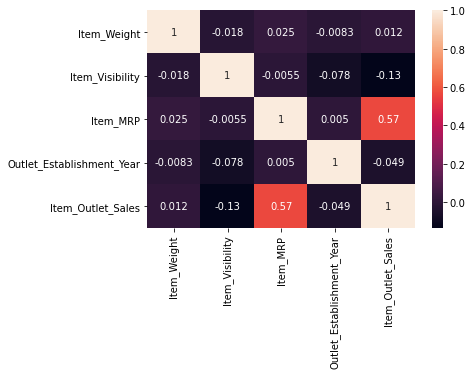

In [68]:
sns.heatmap(a.corr(), annot = True)
plt.show()

 Item_MRP and the target variable has correltion coefficient above 0.5.

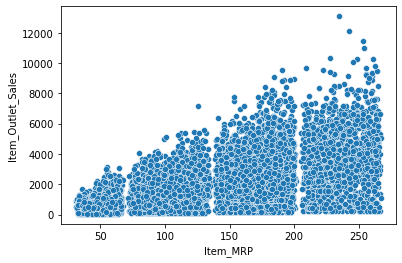

In [69]:
sns.scatterplot(x = a['Item_MRP'], y = a['Item_Outlet_Sales'], data = a)
plt.show()

Sales increase with MRP, there are less number of sales for high MRP value. This trend seems natural, with less price, items tends to be sold out quickly.

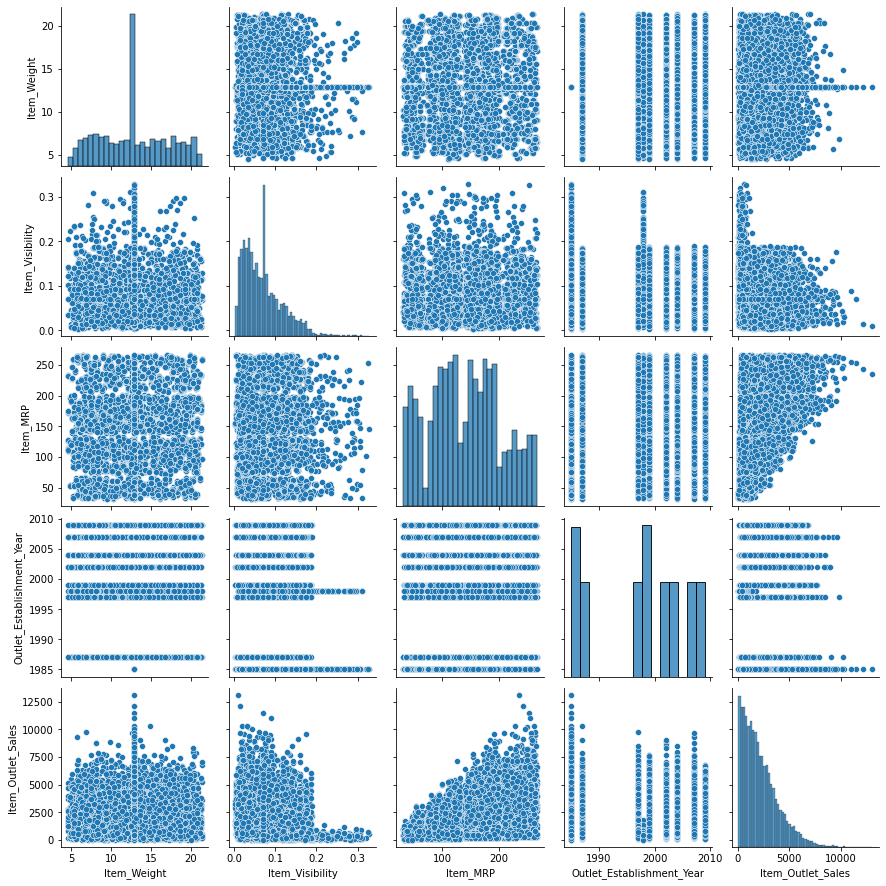

In [70]:
sns.pairplot(a)
plt.show()

Outlet_Establishment year graph looks odd, checking other values

In [71]:
a['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

there are only 9 values here, we can treat this feature as categorical data and encode or bin it.

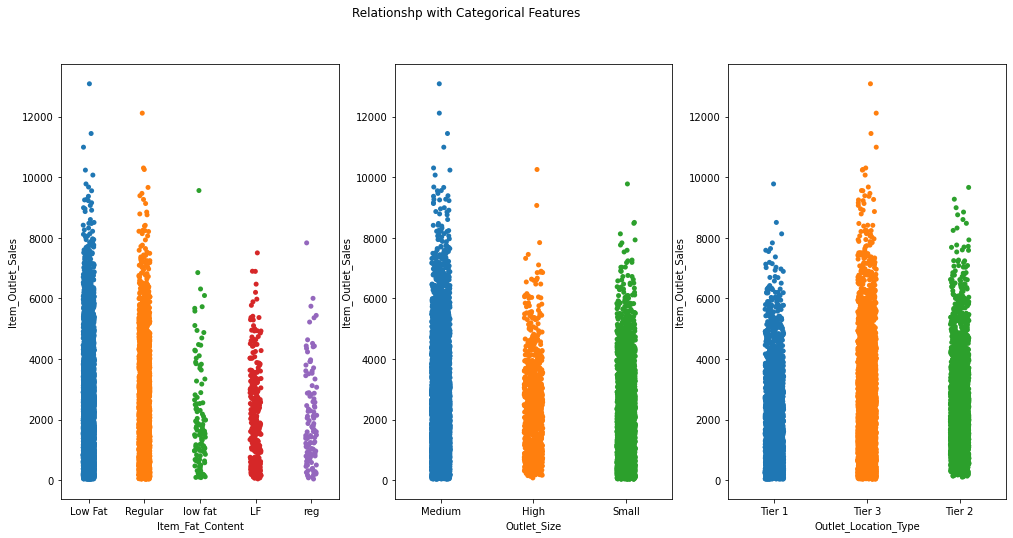

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,8))
fig.subplots_adjust(right=1)
fig.suptitle('Relationshp with Categorical Features')
for ax, feature in zip(axes.flatten(),  categorical[0:3]):
    sns.stripplot(x = feature,  y = 'Item_Outlet_Sales', data = a, ax = ax)
plt.show()

Item Fat Content has error. Low Fat, LF and low fat all belongs to one category

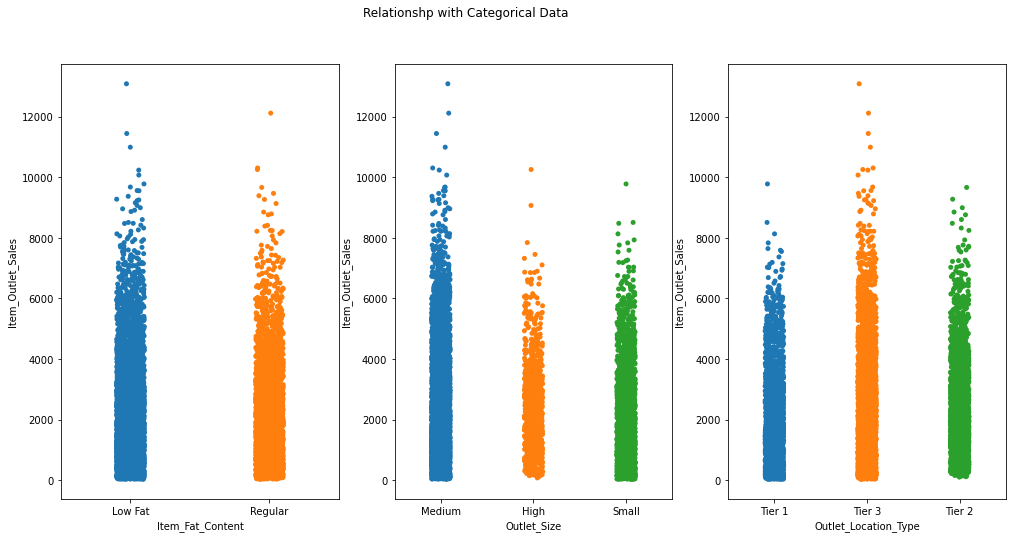

In [73]:
a.Item_Fat_Content = a.Item_Fat_Content.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'})
b.Item_Fat_Content = b.Item_Fat_Content.replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'reg' : 'Regular'})
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,8))
fig.subplots_adjust(right=1)
fig.suptitle('Relationshp with Categorical Data')
for ax, feature in zip(axes.flatten(),  categorical[0:3]):
    sns.stripplot(x = feature,  y = 'Item_Outlet_Sales', data = a, ax = ax)
plt.show()

Low fat Items were sold little more than regular.

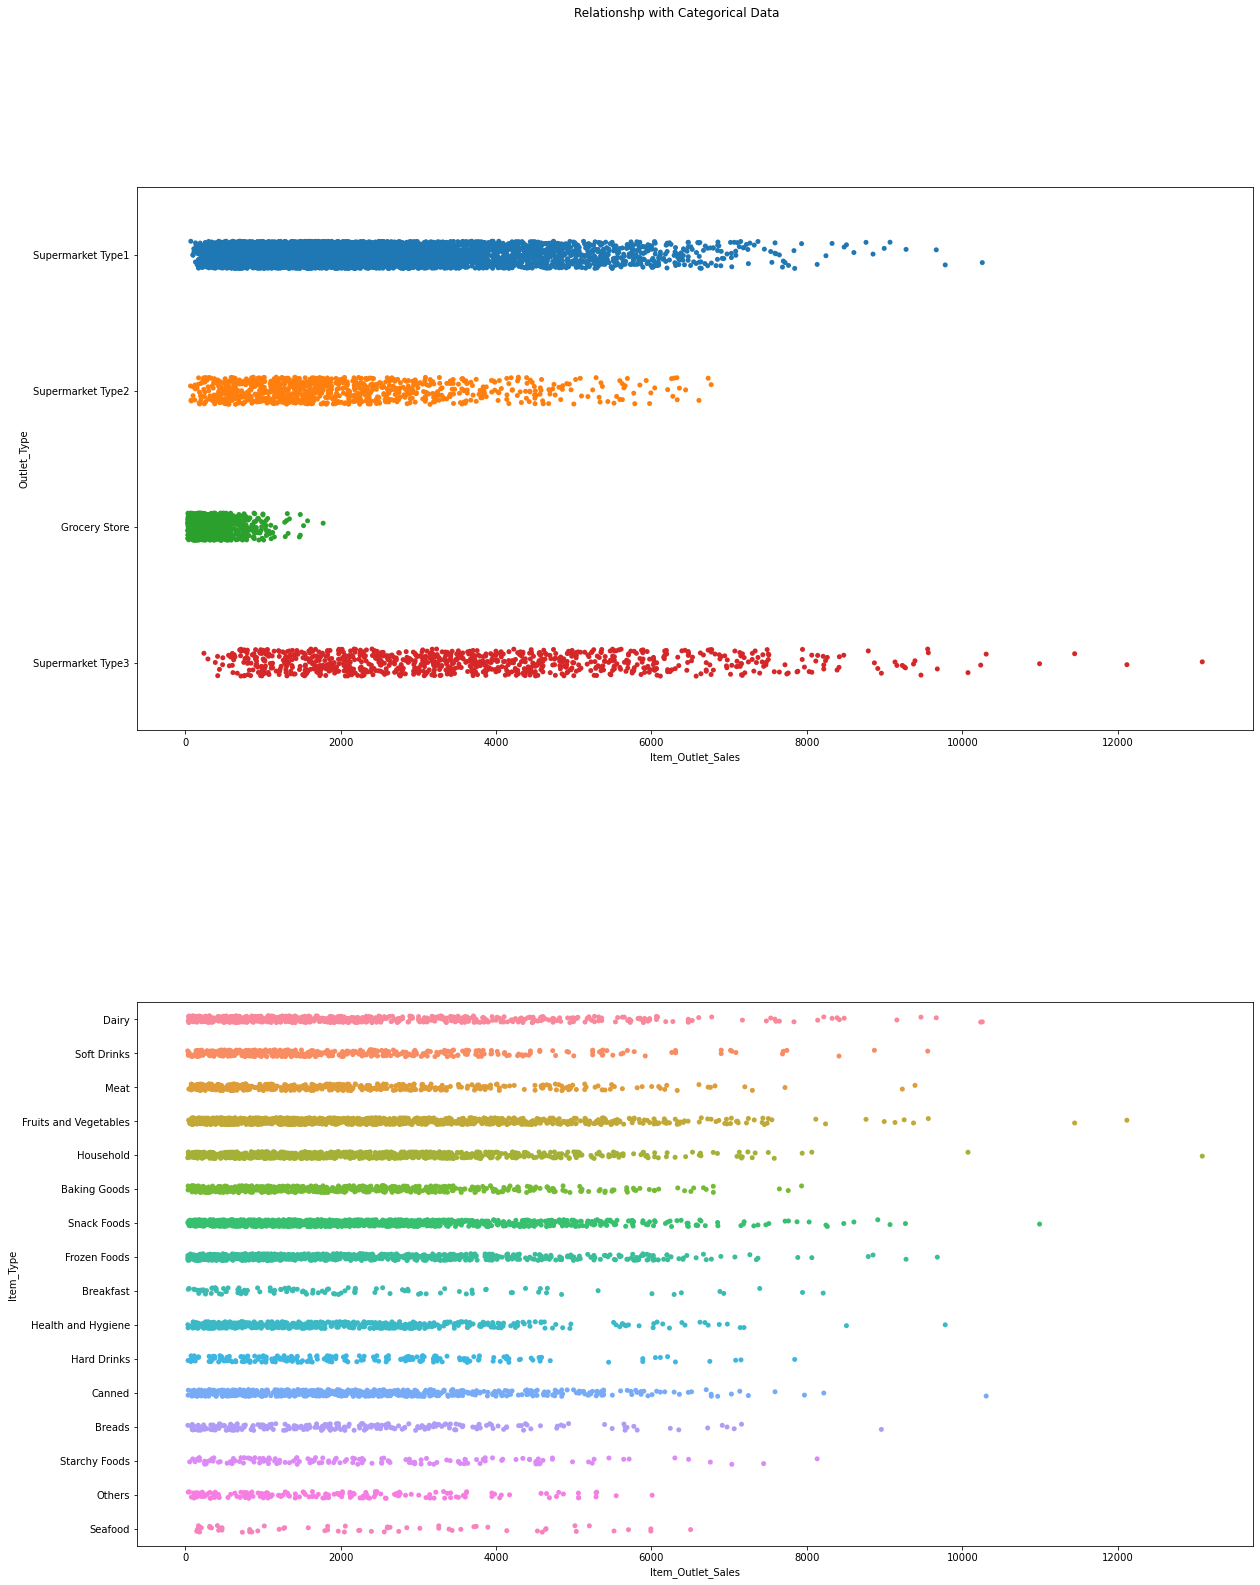

In [74]:
fig, axes = plt.subplots(nrows = 2, ncols=1, figsize = (20,25))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Relationshp with Categorical Data')
for ax, feature in zip(axes.flatten(),  categorical[3:]):
    sns.stripplot(x = 'Item_Outlet_Sales', y = feature, data = a, ax = ax)
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

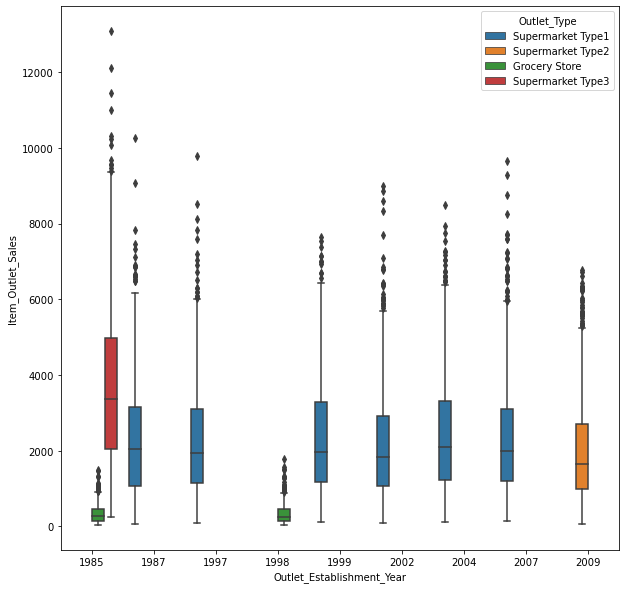

In [75]:
fig,axes = plt.subplots(figsize = (10,10))
sns.boxplot(x = a['Outlet_Establishment_Year'], y = a['Item_Outlet_Sales'], hue = a['Outlet_Type'], ax = axes )
plt.plot

Many outliers are present

In [76]:
# Encoding Categorical
a = pd.get_dummies(a, drop_first = True)
b = pd.get_dummies(b, drop_first = True)

Dropfirst is used to avoid dummy variale trap.
Since Item_Type has many categories, we can use hashing technique on it.

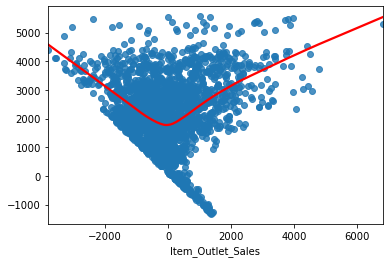

In [77]:

Y = a['Item_Outlet_Sales']
X = a.drop('Item_Outlet_Sales', axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.25)
# Model
# Linear Regression
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, Y_train)
Y_pred = lg.predict(X_test)
residue = Y_test - Y_pred
sns.regplot(residue, Y_pred, lowess = True, line_kws={'color': 'red'})
plt.show()

The graph is funnel shaped. Hence, it is heteroscedasticity.

To correct this, I will log transform Y variable and try.

In [78]:
Y_train = np.log(Y_train)
Y_test = np.log(Y_test)

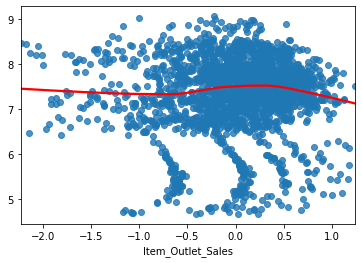

In [79]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, Y_train)
Y_pred = lg.predict(X_test)
residue = Y_test - Y_pred
sns.regplot(residue, Y_pred, lowess = True, line_kws={'color': 'red'})
plt.show()

Using SVR

In [80]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)
Y_pred2 = regressor.predict(X_test)

Calculating RMSE

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test, Y_pred2))
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred2)
print('RMSE = ',rms, ' R2 score = ',r2)

RMSE =  0.9227964290250334  R2 score =  0.1963418399481326


Feature Selection Using Lasso

In [82]:
from sklearn.linear_model import LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005])
model_lasso.fit(X_train, Y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_features = coef.index[coef!=0].tolist()
coef = pd.Series(model_lasso.coef_, index =b.columns)
imp_features


['Item_Weight',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Regular',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Outlet_Size_Medium',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Type_Supermarket Type3']

In [83]:
X_train.shape

(6392, 27)

In [84]:
b.shape

(5681, 27)

In [85]:
X_train = X_train[imp_features]
X_test = X_test[imp_features]
b=b[imp_features]

In [86]:
X_train.shape

(6392, 17)

In [87]:
b.shape

(5681, 17)

Feature Engineering


bin the Outlet_Establishment_Year feature.

In [88]:
from sklearn.preprocessing import KBinsDiscretizer
disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train['Outlet_Establishment_Year'] = disc.fit_transform(X_train[['Outlet_Establishment_Year']])
X_test['Outlet_Establishment_Year'] = disc.fit_transform(X_test[['Outlet_Establishment_Year']])
b['Outlet_Establishment_Year'] = disc.fit_transform(b[['Outlet_Establishment_Year']])

In [102]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)
Y_pred3 = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test, Y_pred3))
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred3)
print('RMSE = ',rms, ' R2 score = ',r2)

RMSE =  0.5456406618482519  R2 score =  0.7190215565324459


In [103]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train.iloc[:,0:2] = sc_X.fit_transform(X_train.iloc[:,0:2])
X_test.iloc[:,0:2] = sc_X.transform(X_test.iloc[:,0:2])

Model after feature scaling

In [104]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, Y_train)
Y_pred3 = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test, Y_pred3))
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred3)
print('RMSE = ',rms, ' R2 score = ',r2)

RMSE =  0.5456406618482528  R2 score =  0.7190215565324449


Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import auc, roc_curve
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(regressor, param_grid, refit = True, verbose = 3) 
  
 fitting the model for grid search 
grid_result=grid.fit(X_train,Y_train) 


In [105]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.735648199578639
Best Params:  {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Saving model

In [106]:
import joblib
joblib.dump(regressor,"bsp.obj")

['bsp.obj']

In [115]:
regressor.predict(b)

array([7.07906019, 7.07906019, 7.07906019, ..., 7.07906019, 7.07906019,
       7.07906019])